# Exercise 2
## Céline Budding && Dorothea Müller

# Configurations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import eig

%matplotlib inline

from helper import gaussian_spectrum_1D

In [2]:
# TODO: REMOVE (!!!)

np.random.seed(1000)

# 1. Slow Feature Analysis on two independent signals

## 1.

In [3]:
def generate_random_signal(T, e):
    v = np.random.random(T)
    v_filtered = gaussian_spectrum_1D(v, e)
    
    return v_filtered

## 2.

In [4]:
T = 1000
all_tau = [30, 100]

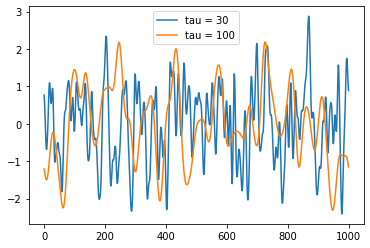

In [5]:
X = np.zeros(shape = (len(all_tau), T))

for i, tau in enumerate(all_tau):
    eps = 1/tau**2
    signal = generate_random_signal(T, eps)
    # Zero mean.
    signal = signal - np.mean(signal)
    # Unit variance.
    signal /= np.std(signal)
    
    
    X[i] = signal
    plt.plot(signal, label = f"tau = {tau}")

plt.legend()

**How does τ influence the characteristics of the signals?**

A higher tau leads to a lower frequency in the data.

## 3. Linear SFA

In [6]:
# Joint covariance matrix.
C = np.cov(X)
C.shape

(2, 2)

In [7]:
C_derivative = np.diff(X) @ np.diff(X).T / (T-1)
C_derivative.shape

(2, 2)

In [8]:
# C is right-hand side matrix in the generalized eigenvalue problem, so is second parameter.
eigval, eigvec = eig(C_derivative, C)
eigvec

array([[-0.99170997,  0.00646458],
       [ 0.12849647,  0.9999791 ]])

The function returns already normalized eigenvectors according to the documentation (see returned values in  https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html), so there is no need to normalize.

In [9]:
# To prove the documentation is correct:
for i in range(eigvec.shape[0]):
    print(np.linalg.norm(eigvec[:, i]))

0.9999999999999999
0.9999999999999999


# 4. 

In [10]:
eigvec

array([[-0.99170997,  0.00646458],
       [ 0.12849647,  0.9999791 ]])

**What kind of mixture do you ideally expect given how the data was generated?**

One signal has been generated so it changes more slowly than the other one. As the eigenvectors determine the weight for the linear combination, we expect the eigenvectors to take the slower generated signal more into account.

**What does the empirical mixture look like, judging from the extracted eigenvectors?**

For one eigenvector, we see that there is one large value and one small value, indicating that one signal has a much larger weight than the other. However, the weighting seems reversed for the other eigenvector which might be because the eigenvectors need to be orthogonal.

# TODO
We can see in the eigenvectors that there is one large value and one small value in each of the two vectors, indicating that one of the components has a much larger weight than the other. We cannot determine which of the both it is.

## 5.

In [11]:
def linear_SFA(sample_size, tau = 30):
    # Generate signal.
    
    eps = 1/tau**2
    signal = generate_random_signal(sample_size, eps)
    # Zero mean.
    signal = signal - np.mean(signal)
    # Unit variance.
    signal /= np.std(signal)
    
    C = np.cov(signal)
    C_derivative = np.diff(signal) @ np.diff(signal).T / (T-1)
    eigval, eigvec = eig(C_derivative, C)
    return eigvec

In [12]:
sample_sizes = np.linspace(0, 10000, num=20)
sample_sizes = [int(s) for s in sample_sizes]
sample_sizes

[0,
 526,
 1052,
 1578,
 2105,
 2631,
 3157,
 3684,
 4210,
 4736,
 5263,
 5789,
 6315,
 6842,
 7368,
 7894,
 8421,
 8947,
 9473,
 10000]

In [13]:
all_eigvec = []
for size in sample_sizes:
    all_eigvec.append(linear_SFA(size))

ValueError: Invalid number of FFT data points (0) specified.